In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# U ovom jupyter notebooku modeliramo spektralne linije! 

### Analiziracemo jedan semi-empirijski model atmosfere - i izracunati neke spektralne linije.

### Krenucemo prvo od Milne-Eddington atmosfere, da se malo upoznamo sa linijama

### A onda cemo modifikovati nas stari jupyter notebook u kom smo radili sa FALC modelom atmosfere da izmodeliramo malo detaljnije neke spektralne linije.

### Paznja: Mi ovde ne modeliramo neke >>stvarne<< spektralne linije, vec kao neke "toy modele" 

### Taj model su u stvari nizovi vrednosti koji opisuju kako fizicki parametri zavise od visine (odnosno optičke dubine)

### Uskoro ćemo videti šta ovaj naš model sadrži ali u principu najvažnija dva parametra su Temperatura i pritisak gasa. 


#### Koristimo model atmosfere u fajlu falc_71.dat

#### Potrebne su nam prve cetiri kolone. To su:
#### 0 - logaritam opticke dubine
#### 1 - visina u cm 
#### 2 - temperatura u K
#### 3 - pritisak gasa u dyn / cm^2

In [2]:
import numpy as np
import matplotlib.pyplot as plt 

### Pre nego sto se bacimo na racunanje linije u "stvarnom" modelu atmosfere. Hajde da se pozabavimo necim jednostavnijim:

### Funkcija izvora je linearna: $ S = a + b \tau_c$ 

### Neprozracnost u spektralnoj liniji izgleda ovako: $\chi_\lambda = \chi_c ( 1+ \eta \phi_\lambda)$ 

### Gde je $\phi_\lambda$ tzv. apsorpcioni profile

### Iz ovoga sledi da je $\tau_\lambda = \tau_c (1 + \eta \phi_\lambda)$ 

### Izveli smo da je izlazni intenzitet, tj spektar ove spektralne linije ovakav: $I_\lambda = a + \frac{b}{1+ \eta \phi_\lambda}$

In [3]:
# Hajde da iskodiramo ovo gore i da vidimo kako izgleda spektar jedne spektralne linije. 

# Hajde da se prvo pozabavimo apsorpcionim profilom 

# Prva aproksimacija (ako bude vremena napravicemo jos komplikovanijim) je da je ovo neki doplerov profil

llambda0 = 656.3 # u nm, ali nije da je bitno, za sada
#delta_l_d =? # hajde da ovo izracunamo preko neke temperature

# delta_l_d = sqrt(2kT/m) / c * llambda0

k = 1.38E-23
T = 6000
m = 1.67E-27

v_sr = np.sqrt(2*k*T/m)

In [4]:
v_sr  # ovo ce biti u m/s

9957.9956139128

In [5]:
delta_l_d = v_sr / 3E8 * llambda0
print(delta_l_d)

0.021784775071369902


In [11]:
llambda = np.linspace(-0.4,0.4,401) + llambda0
#print (llambda)

In [12]:
phi_lambda = 1./np.sqrt(3.14) * np.exp(-(llambda-llambda0)**2.0 / delta_l_d ** 2.0)

In [13]:
# Hajde da isplotujemo nas aps. profil:

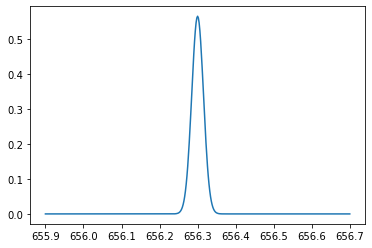

In [14]:
plt.plot(llambda, phi_lambda)

In [15]:
# Mozemo da "resimo" JPZ. (Tj mi smo to vec resili analiticki, posto znamo da je S = a + b tau_c)

In [16]:
a = 0.5 
b = 0.5 
eta = 10.0

I_lambda = a + b /(1.0 + eta * phi_lambda)

Text(0, 0.5, 'Intenzitet [A.J.]')

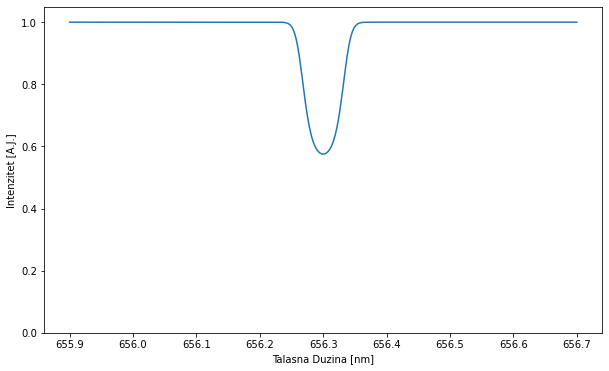

In [18]:
plt.figure(figsize=[10,6])
plt.plot(llambda, I_lambda)
plt.ylim([0,1.05])
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [A.J.]") # arbitrarne jedinice, ne astronomske :)

Text(0, 0.5, 'Intenzitet [A.J.]')

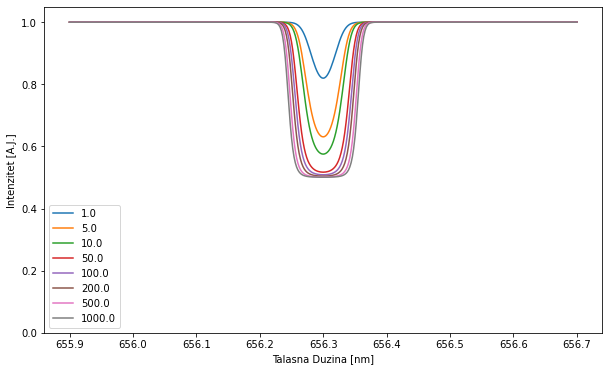

In [20]:
# Hajde da vidimo kako parametar eta utice na jacinu i oblik spektralne linije:

eta = np.array([1.0,5.0,10.,50.,100.,200.,500.,1000.])

plt.figure(figsize=[10,6])

for i in range(0,len(eta)):
    
    I_lambda = a + b /(1.0 + eta[i] * phi_lambda)
    
    plt.plot(llambda, I_lambda, label=str(eta[i]))

plt.legend()
plt.ylim([0,1.05])
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [A.J.]") # arbitrarne jedinice, ne astronomske :)

Text(0, 0.5, 'Intenzitet [A.J.]')

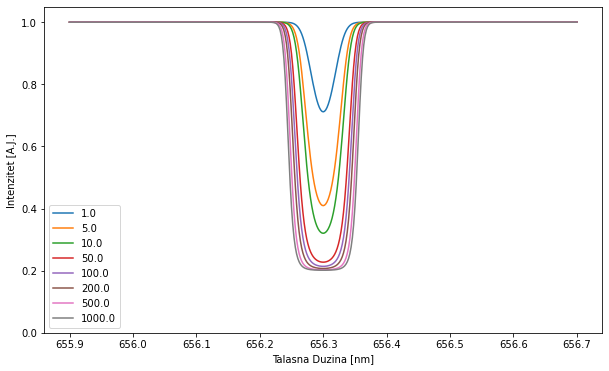

In [23]:
a = 0.2
b = 0.8

eta = np.array([1.0,5.0,10.,50.,100.,200.,500.,1000.])

plt.figure(figsize=[10,6])

for i in range(0,len(eta)):
    
    I_lambda = a + b /(1.0 + eta[i] * phi_lambda)
    
    plt.plot(llambda, I_lambda, label=str(eta[i]))

plt.legend()
plt.ylim([0,1.05])
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [A.J.]") # arbitrarne jedinice, ne astronomske :)

## Zaključci koje smo ovde izveli:

### - Oblik linije i njena ekvivalentna širina se ne menjaju linearno sa eta - postoji neka saturacija
### - Ekvivalentna širina, a i dubina linije zavise od eta, ali i od a i b. 

### - Generalno, "strmiji" nagib funkcije izvora vodi ka dubljim spektralnim linijama.

# Komplikovaniji slucaj: Izracunajte funkciju izvora iz FALC modela Sunčeve atmosfere, 
# pa za liniju koju ste isto ovako parametrizovali, izračunajte spektar numerički! 

In [25]:
atmos = np.loadtxt("falc_71.dat", unpack=True, skiprows=1)

In [26]:
atmos.shape

(12, 71)

In [28]:
logtau = np.copy(atmos[0]) # bezdimenziono
h = np.copy(atmos[1]) / 1E5 # u km -> ovo nam sada nece trebati
T = np.copy(atmos[2]) # u K  
pg = np.copy(atmos[3]) # u dyn / cm^2 -> ovo nam sada nece trebati takodje

Text(0.5, 1.0, 'Temperatura u FALC modelu atmosfere')

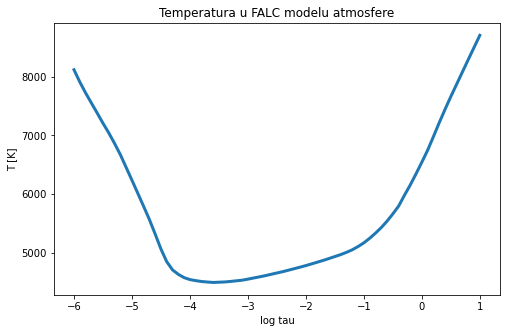

In [29]:
plt.figure(figsize=[8,5])
plt.plot(logtau,T, linewidth=3)
plt.xlabel("log tau")
plt.ylabel("T [K]")
plt.title("Temperatura u FALC modelu atmosfere")

In [31]:
# Sledeci zadatak nam je da izracunamo funkciju izvora za ovu spektralnu liniju

# Imamo temperaturu, T

# i imamo talasnu duzinu u centru linije, llambda 0 

# Najbolje sto mozemo je da pp da spektralna nastaje u LTR 

# Onda je funkcija izvora jednaka plankovoj funkciji:

# Necu sada da vas ubedjujem da nema potrebe da racunamo S pojedinacno za svaku talasnu duzinu - proverite sami ako sumnjate

In [37]:
h = 6.626E-34 
c = 3E8 

S = 2 * h * c**2.0 / (llambda0*1E-9)**5.0 * (np.exp(h*c/(llambda0*1E-9)/k/T - 1))**(-1.)

Text(0.5, 1.0, 'Funkcija izvora u LTR na 656.3 nm u FALC modelu atmosfere')

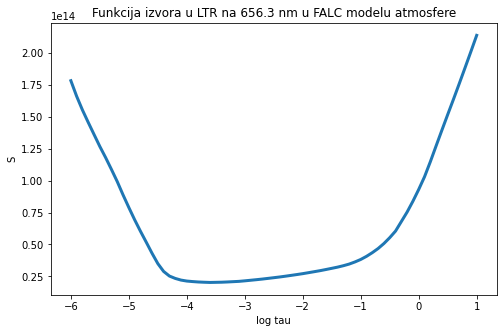

In [39]:
plt.figure(figsize=[8,5])
plt.plot(logtau,S, linewidth=3)
plt.xlabel("log tau")
plt.ylabel("S")
plt.title("Funkcija izvora u LTR na 656.3 nm u FALC modelu atmosfere")

In [40]:
# Imamo funkciju izvora - jedan deo posla je gotov. 

# Hajde da napravimo opticku dubinu u liniji. Za to cemo da iskoristimo istu aproksimaciju kao sto smo imali gore: 

# tau_lambda = tau_c (1+eta * phi)

tau_c = 10.**logtau
eta = 50.0
tau_llambda = tau_c[:,None] * (1.0 + eta * phi_lambda[None,:])

In [41]:
tau_llambda.shape

(71, 401)

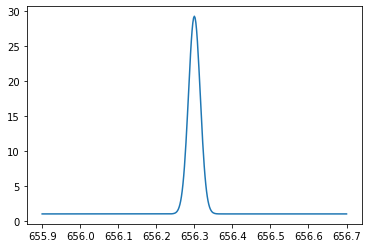

In [42]:
# Hajde da vizualizujemo zavisnost od talasne duzine:

plt.plot(llambda, tau_llambda[60,:])

## Kako sada da dobijemo spektar? 

## Pa, za svaku talasnu duzinu, treba da resimo JPZ: 

## $I_\lambda = \int_0^{\infty} S(\tau_\lambda) e^{-\tau_\lambda} d \tau_\lambda$

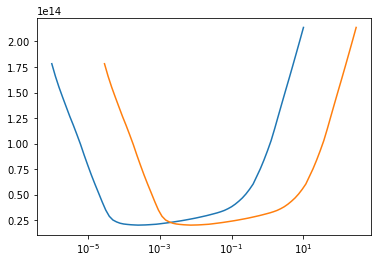

In [44]:
# Hajde da uporedimo S ( tau_lambda) na dva razlicita lambda:

plt.semilogx(tau_llambda[:,0], S)
plt.semilogx(tau_llambda[:,200], S)

## Da resimo ovaj gore integral, koristicemo numericko resenje JPZ koje smo napisali na vezbama #6:

In [45]:
def formal_solution(tau, S, mu):
    
    ND = len(tau)
    I = np.zeros(ND)
    
    step = -1
    start = ND-1
    end = 0
    I[start] = S[start]
    
    
    if (mu < 0):
        step = 1
        start = 0 
        end = ND -1
        I[0] = 0.0
        
    for i in range(start+step, end+step, step):
        
        
        
        S_mean = (S[i] + S[i-step]) * 0.5
        
        delta = (tau[i-step] - tau[i]) / mu 
        
        #print (i, delta)
        
        I[i] = I[i-step] * np.exp(-delta) + S_mean * (1.0 - np.exp(-delta))
        
        
    return I
        

In [48]:
## Kako se racuna spektar? Za svaku talasnu duzinu, tj. za svako tau_lambda i S_lambda (S_lambda ne zavisi od lambda, ali ok):
## Izracunamo intenzitet, i uzmemo izlazni intenzitet i spakujemo u niz

spektar = np.zeros(len(phi_lambda))

for i in range(0,len(spektar)):
    
    # resi mi jednacinu prenosa za tu talasnu duzinu:
    
    I_temp = formal_solution(tau_llambda[:,i], S, mu=1.0)
    
    spektar[i] = I_temp[0]

Text(0, 0.5, 'Intenzitet [SI]')

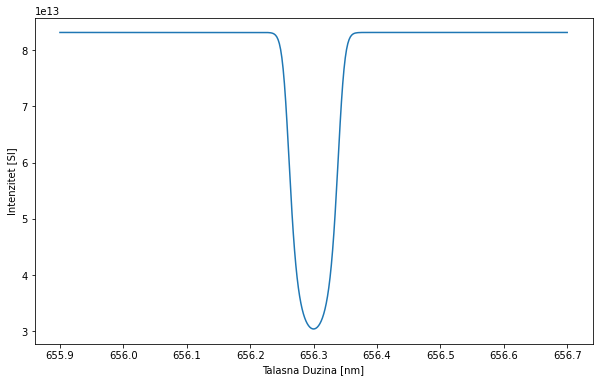

In [49]:
plt.figure(figsize=[10,6])
plt.plot(llambda, spektar)
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [SI]") 

Text(0.5, 1.0, 'Funkcija izvora u LTR na 656.3 nm u FALC modelu atmosfere')

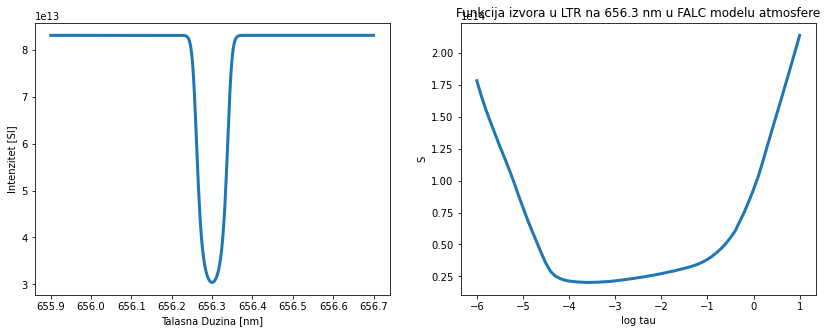

In [51]:
# Da bismo ovo bolje razumeli / analizirali, isplotujmo sa strane funkciju izvora sa optickom dubinom:

plt.figure(figsize=[14,5])
plt.subplot(121)
plt.plot(llambda, spektar, linewidth=3)
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [SI]") # arbitrarne jedinice, ne astronomske :)

plt.subplot(122)
plt.plot(logtau,S, linewidth=3)
plt.xlabel("log tau")
plt.ylabel("S")
plt.title("Funkcija izvora u LTR na 656.3 nm u FALC modelu atmosfere")

# Hajde da ispitamo kako sada eta deluje na oblik linije:

In [52]:
def izracunaj_spektar(tau_llambda, S, mu):
    
    spektar = np.zeros(tau_llambda.shape[1])

    for i in range(0,len(spektar)):
    
    # resi mi jednacinu prenosa za tu talasnu duzinu:
    
        I_temp = formal_solution(tau_llambda[:,i], S, mu=1.0)
    
        spektar[i] = I_temp[0]
        
    return spektar

Text(0, 0.5, 'Intenzitet [SI]')

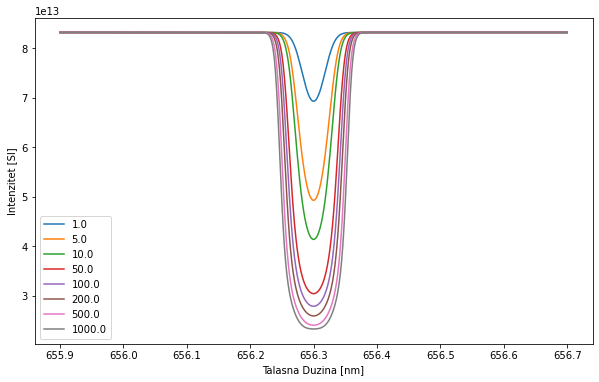

In [57]:
eta = np.array([1.0,5.0,10.,50.,100.,200.,500.,1000.])#,5000.,10000.,50000.,100000])

plt.figure(figsize=[10,6])


for i in range(0,len(eta)):
    
    tau_llambda = tau_c[:,None] * (1.0 + eta[i] * phi_lambda[None,:])
    
    spektar = izracunaj_spektar(tau_llambda, S, 1.0)
    
    plt.plot(llambda, spektar, label = str(eta[i]))
    
    plt.legend()
        
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [SI]")    
   

Text(0.5, 1.0, 'Funkcija izvora u LTR na 656.3 nm u FALC modelu atmosfere')

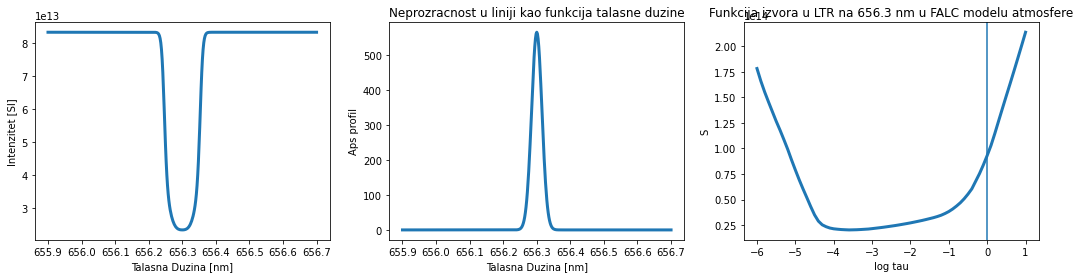

In [61]:
# Da bismo, nadamo se, jos bolje ovo razumeli / analizirali, isplotujmo sa strane funkciju izvora sa optickom dubinom i isplotujmo aps. profil linije

plt.figure(figsize=[18,4])
plt.subplot(131)
plt.plot(llambda, spektar, linewidth=3)
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [SI]") # arbitrarne jedinice, ne astronomske :)

plt.subplot(132)
plt.plot(llambda, 1+eta[-1]*phi_lambda, linewidth=3)
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Aps profil")
plt.title("Neprozracnost u liniji kao funkcija talasne duzine")

plt.subplot(133)
plt.plot(logtau,S, linewidth=3)
plt.axvline(x=0)
plt.xlabel("log tau")
plt.ylabel("S")
plt.title("Funkcija izvora u LTR na 656.3 nm u FALC modelu atmosfere")

Text(0, 0.5, 'Intenzitet [SI]')

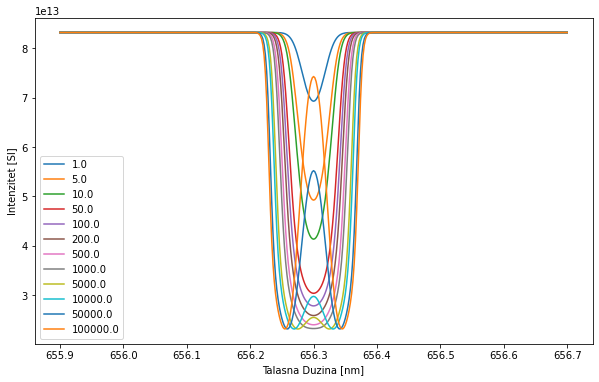

In [62]:
eta = np.array([1.0,5.0,10.,50.,100.,200.,500.,1000.,5000.,10000.,50000.,100000])

plt.figure(figsize=[10,6])


for i in range(0,len(eta)):
    
    tau_llambda = tau_c[:,None] * (1.0 + eta[i] * phi_lambda[None,:])
    
    spektar = izracunaj_spektar(tau_llambda, S, 1.0)
    
    plt.plot(llambda, spektar, label = str(eta[i]))
    
    plt.legend()
        
plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [SI]")    

## Sta bismo jos mogli da ispitamo? 

### - Mogli bismo da profil linije ucinimo realnijim: uvedemo zavisnost od T koja se menja sa dubinom. Ili da uvedemo Fojtov (Voigt-ov profil), da bi ovo izgledalo realnije

### - Mogli bismo da menjamo centralnu talasnu duzinu linije: ovo bi uticalo na oblik S(tau), pa samim tim i na oblik linije 

### - Mogli bismo da ispitujemo zavisnost izlaznog spektra od mi (cos theta)

### - Mogli bismo da vidimo kako bi se ovde uveo Doplerov efekat zbog kretanja atmosfere! 

In [63]:
# Pretpostavimo da imamo neku brzinu atmosfere, ka nama ili od nas. Kako bismo to implementirali u ovaj racun?

vz = 20 # km/s ?

# Ovo je relativno jednostavno: Nas profil ce biti malo "de-centiran":
llambda0p = llambda0 * (1. + vz / 3E5 )

phi_lambda = 1./np.sqrt(3.14) * np.exp(-(llambda-llambda0p)**2.0 / delta_l_d ** 2.0)

Text(0, 0.5, 'Intenzitet [SI]')

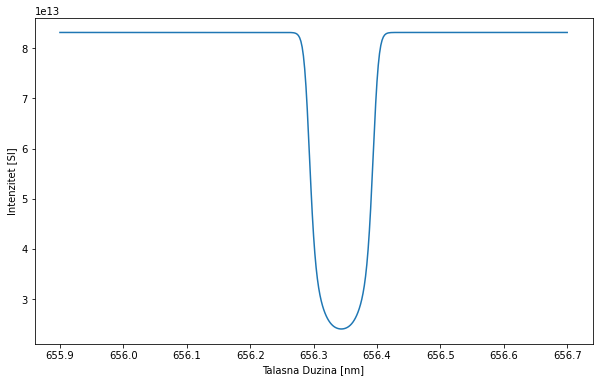

In [66]:
eta = 500.0

plt.figure(figsize=[10,6])
tau_llambda = tau_c[:,None] * (1.0 + eta * phi_lambda[None,:])
spektar = izracunaj_spektar(tau_llambda, S, 1.0)
plt.plot(llambda, spektar, label = str(eta))

plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [SI]")  

## Razlog zasto smo ovo radili ovako je sto brzina moze da se menja sa dubinom. Onda ce mi aps. profil zavisiti od dubine:

In [77]:
vz = np.linspace(-20,20,71)
eta = 1E5

# Profil zavisi od dubine, zato sto je na svakoj dubini razlicito pomeren usled doplerovog efekta
phi_lambda_d = np.zeros([71,401])

for d in range(0,71):
    
    llambda0p = llambda0 * (1. + vz[d] / 3E5 )

    phi_lambda_d[d] = 1./np.sqrt(3.14) * np.exp(-(llambda-llambda0p)**2.0 / delta_l_d ** 2.0)    


In [78]:
tau_llambda = tau_c[:,None] * (1.0 + eta * phi_lambda_d)

Text(0, 0.5, 'Intenzitet [SI]')

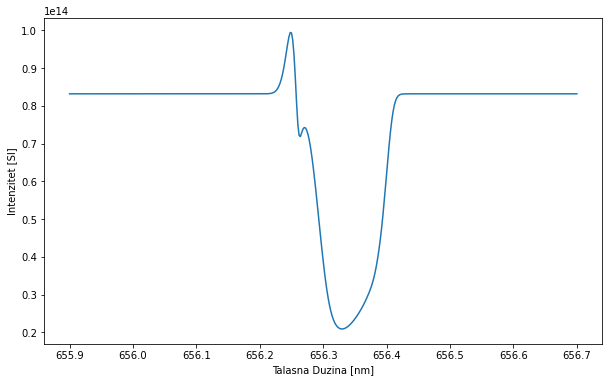

In [79]:
plt.figure(figsize=[10,6])
spektar = izracunaj_spektar(tau_llambda, S, 1.0)
plt.plot(llambda, spektar, label = str(eta))

plt.xlabel("Talasna Duzina [nm]")
plt.ylabel("Intenzitet [SI]")  

## Dobijamo neku jako jako cudnu spektralnu liniju koja prelazi iz emisije u apsorpciju. Ovo je sve posledica gradijenta brzine.